# Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• Which variables are significant in predicting the price of a car
• How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.
Apply any 5 algorithms to the regression problem provided.
For example:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor
Rootmap:
1. Understand problem statement
2. Import necessary libraries and data
3.  Check the data
Info()
Describe((
Isnull()
Duplicated()
Df. Columns
Length of unique values in each column.
4. Data preprocessing
Drop car id
Find unique values in categorical or count plot
extract company name from car name and address this new col to df also remove car name column.
There are spelling mistakes in company name. Treat this.
Label encoding all the categorical columns
Outliers detection and removal( if present)
5. Feature selection
Find correlation matrix
Remove multicolinearity (remove features with High correlation .85 to 1)
6. Data splitting
Test, train
7. Model selection and implementation
8. Model evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
from this above output we can show that there is no any null value available in the data.

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
print("car_ID:",df.car_ID.nunique())
print("symboling:",df.symboling.nunique())
print("CarName:",df.CarName.nunique())
print("fueltype:",df.fueltype.nunique())
print("aspiration:",df.aspiration.nunique())
print("doornumber:",df.doornumber.nunique())
print("carbody:",df.carbody.nunique())
print("drivewheel:",df.drivewheel.nunique())
print("enginelocation:",df.enginelocation.nunique())
print("wheelbase:",df.wheelbase.nunique())
print("carlength:",df.carlength.nunique())
print("carwidth:",df.carwidth.nunique())
print("carheight:",df.carheight.nunique())
print("curbweight:",df.curbweight.nunique())
print("enginetype:",df.enginetype.nunique())
print("cylindernumber:",df.cylindernumber.nunique())
print("wheelbase:",df.wheelbase.nunique())
print("enginesize:",df.enginesize.nunique())
print("fuelsystem:",df.fuelsystem.nunique())
print("boreratio:",df.boreratio.nunique())
print("stroke:",df.stroke.nunique())
print("compressionration:",df.compressionratio.nunique())
print("horsepower:",df.horsepower.nunique())
print("peakrpm:",df.peakrpm.nunique())
print("citympg:",df.citympg.nunique())
print("highwaympg:",df.highwaympg.nunique())
print("price:",df.price.nunique())

car_ID: 205
symboling: 6
CarName: 147
fueltype: 2
aspiration: 2
doornumber: 2
carbody: 5
drivewheel: 3
enginelocation: 2
wheelbase: 53
carlength: 75
carwidth: 44
carheight: 49
curbweight: 171
enginetype: 7
cylindernumber: 7
wheelbase: 53
enginesize: 44
fuelsystem: 8
boreratio: 38
stroke: 37
compressionration: 32
horsepower: 59
peakrpm: 23
citympg: 29
highwaympg: 30
price: 189


In [10]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [11]:
df.drop(['car_ID'],axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
df.loc[:,('CarName')] 

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [13]:
df['company'] = df['CarName'].str.split().str[0]
df['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [14]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [15]:
df.drop(['CarName'],axis=1,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [16]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
df['company'] = df['company'].str.replace('alfa-romero','Alfa Romeo')
df['company'] = df['company'].str.replace('audi','Audi')
df['company'] = df['company'].str.replace('vokswagen','Volkswagen')
df['company'] = df['company'].replace({'vw':'Volkswagen','maxda':'Mazda','mazda':'Mazda','nissan':'Nissan'})
df['company'] = df['company'].replace({'volkswagen':'Volkswagen','toyouta':'Toyota','toyota':'Toyota','porcshce':'Porsche','porsche':'Porsche','isuzu':'Izusu'})

df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Alfa Romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Alfa Romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Alfa Romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [18]:
df.company.unique()

array(['Alfa Romeo', 'Audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'Izusu', 'jaguar', 'Mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'Porsche', 'renault', 'saab',
       'subaru', 'Toyota', 'Volkswagen', 'volvo'], dtype=object)

In [19]:
from sklearn import preprocessing

In [20]:
label_encoder=preprocessing.LabelEncoder()

In [21]:
df['symboling']=label_encoder.fit_transform(df['symboling'])
df['fuel_type']=label_encoder.fit_transform(df['fueltype'])
df['aspiration']=label_encoder.fit_transform(df['aspiration'])
df['door_number']=label_encoder.fit_transform(df['doornumber'])
df['car_body']=label_encoder.fit_transform(df['carbody'])
df['drive_wheel']=label_encoder.fit_transform(df['drivewheel'])
df['engine_location']=label_encoder.fit_transform(df['enginelocation'])
df['company_name']=label_encoder.fit_transform(df['company'])
df['fuelsystem']=label_encoder.fit_transform(df['fuelsystem'])
df['cylindernumber']=label_encoder.fit_transform(df['cylindernumber'])
df['enginetype']=label_encoder.fit_transform(df['enginetype'])


In [22]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,company,fuel_type,door_number,car_body,drive_wheel,engine_location,company_name
0,5,gas,0,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495.0,Alfa Romeo,1,1,0,2,0,0
1,5,gas,0,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,Alfa Romeo,1,1,0,2,0,0
2,3,gas,0,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,Alfa Romeo,1,1,2,2,0,0
3,4,gas,0,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,Audi,1,0,3,1,0,1
4,4,gas,0,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,Audi,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,gas,0,four,sedan,rwd,front,109.1,188.8,68.9,...,23,28,16845.0,volvo,1,0,3,2,0,21
201,1,gas,1,four,sedan,rwd,front,109.1,188.8,68.8,...,19,25,19045.0,volvo,1,0,3,2,0,21
202,1,gas,0,four,sedan,rwd,front,109.1,188.8,68.9,...,18,23,21485.0,volvo,1,0,3,2,0,21
203,1,diesel,1,four,sedan,rwd,front,109.1,188.8,68.9,...,26,27,22470.0,volvo,0,0,3,2,0,21


In [23]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['symboling', 'aspiration', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fuel_type', 'door_number',
       'car_body', 'drive_wheel', 'engine_location', 'company_name'],
      dtype='object')

In [24]:
df.cylindernumber.unique()

array([2, 3, 1, 4, 5, 6, 0])

In [25]:
df.enginetype.unique()

array([0, 5, 3, 2, 6, 4, 1])

In [26]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df

,symboling,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,peakrpm,citympg,highwaympg,price,fuel_type,door_number,car_body,drive_wheel,engine_location,company_name
0,5,0,88.6,168.8,64.1,48.8,2548,0,2,130,...,5000,21,27,13495.0,1,1,0,2,0,0
1,5,0,88.6,168.8,64.1,48.8,2548,0,2,130,...,5000,21,27,16500.0,1,1,0,2,0,0
2,3,0,94.5,171.2,65.5,52.4,2823,5,3,152,...,5000,19,26,16500.0,1,1,2,2,0,0
3,4,0,99.8,176.6,66.2,54.3,2337,3,2,109,...,5500,24,30,13950.0,1,0,3,1,0,1
4,4,0,99.4,176.6,66.4,54.3,2824,3,1,136,...,5500,18,22,17450.0,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,109.1,188.8,68.9,55.5,2952,3,2,141,...,5400,23,28,16845.0,1,0,3,2,0,21
201,1,1,109.1,188.8,68.8,55.5,3049,3,2,141,...,5300,19,25,19045.0,1,0,3,2,0,21
202,1,0,109.1,188.8,68.9,55.5,3012,5,3,173,...,5500,18,23,21485.0,1,0,3,2,0,21
203,1,1,109.1,188.8,68.9,55.5,3217,3,3,145,...,4800,26,27,22470.0,0,0,3,2,0,21


In [27]:
print(len(numerical_df.columns))

25


In [ ]:
# feature selection

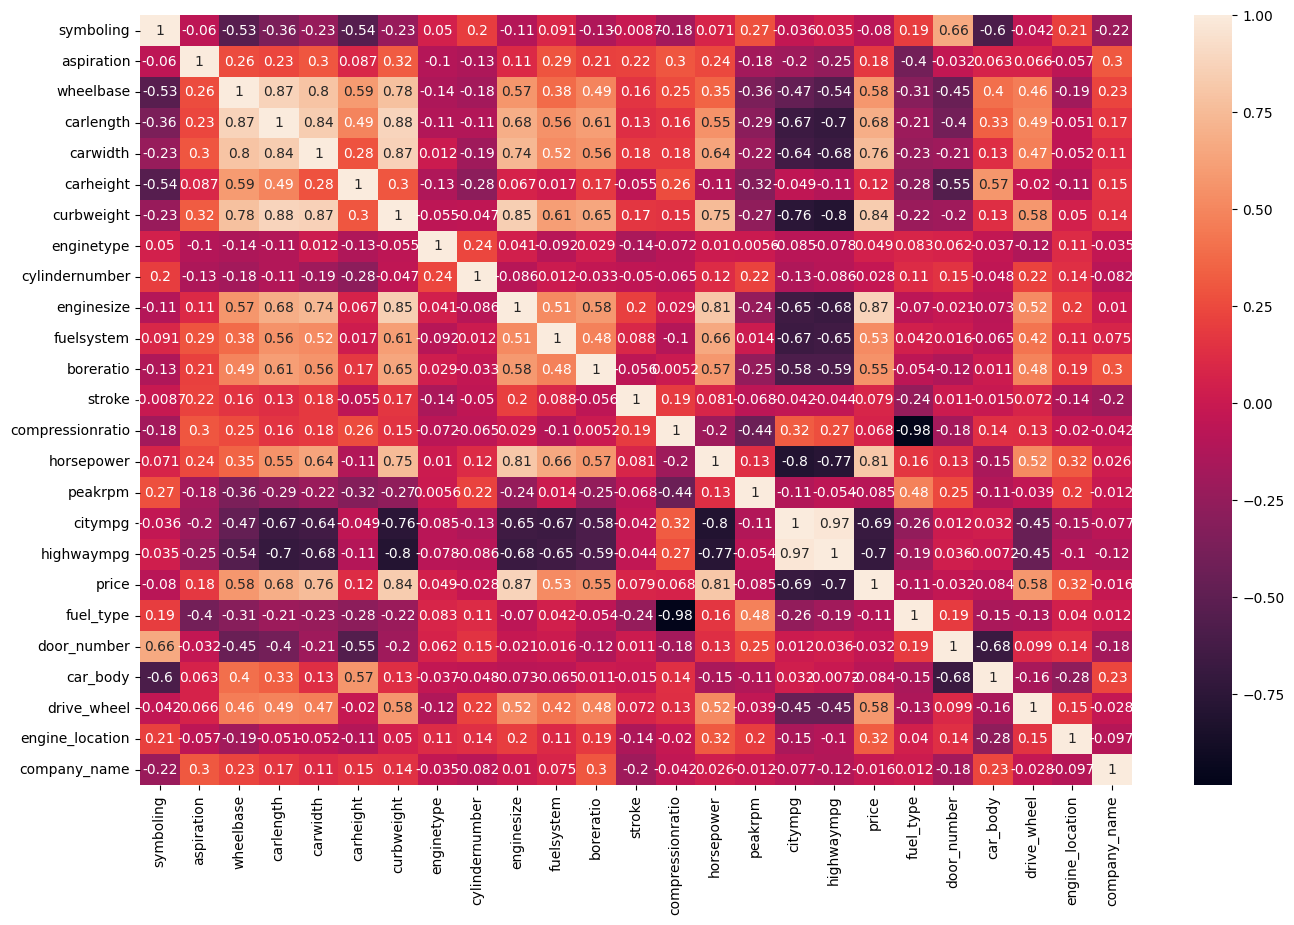

In [28]:
plt.figure(figsize=(16,10))
h=sns.heatmap(numerical_df.corr(),annot=True)
plt.show()

In [30]:
x=df[['symboling','aspiration','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','door_number','car_body','fuel_type','drive_wheel','car_body','drive_wheel','engine_location','company_name']]
y=df[['price']]
x.head()

,symboling,aspiration,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,highwaympg,price,door_number,car_body,fuel_type,drive_wheel,car_body,drive_wheel,engine_location,company_name
0,5,0,88.6,168.8,64.1,48.8,2548,0,2,130,...,27,13495.0,1,0,1,2,0,2,0,0
1,5,0,88.6,168.8,64.1,48.8,2548,0,2,130,...,27,16500.0,1,0,1,2,0,2,0,0
2,3,0,94.5,171.2,65.5,52.4,2823,5,3,152,...,26,16500.0,1,2,1,2,2,2,0,0
3,4,0,99.8,176.6,66.2,54.3,2337,3,2,109,...,30,13950.0,0,3,1,1,3,1,0,1
4,4,0,99.4,176.6,66.4,54.3,2824,3,1,136,...,22,17450.0,0,3,1,0,3,0,0,1


In [ ]:
# EDA

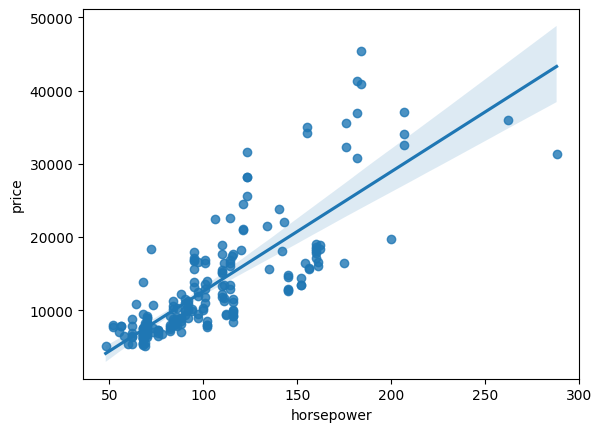

In [31]:
sns.regplot(x='horsepower',y='price',data=df)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [33]:
x_train
x_test
y_train
y_test

,price
78,6669.0
97,7999.0
151,6338.0
44,8916.5
40,10295.0
67,25552.0
98,8249.0
18,5151.0
152,6488.0
62,10245.0


In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 27)
(41, 27)
(164, 1)
(41, 1)


1. Linear Regression

In [ ]:
# model selection and implimentation

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
clf=LinearRegression()

In [ ]:
# model training

In [37]:
clf.fit(x_train,y_train)

LinearRegression()

In [ ]:
# model evaluation

In [38]:
clf.score(x_test,y_test)

1.0

In [39]:
predict=clf.predict(x_test)
predict

array([[ 6669. ],
       [ 7999. ],
       [ 6338. ],
       [ 8916.5],
       [10295. ],
       [25552. ],
       [ 8249. ],
       [ 5151. ],
       [ 6488. ],
       [10245. ],
       [17450. ],
       [17669. ],
       [16515. ],
       [ 9095. ],
       [12964. ],
       [11199. ],
       [ 9980. ],
       [ 6529. ],
       [18150. ],
       [11259. ],
       [ 8948. ],
       [ 6855. ],
       [16925. ],
       [ 7957. ],
       [ 9989. ],
       [ 7129. ],
       [14489. ],
       [ 7995. ],
       [ 6229. ],
       [ 7295. ],
       [ 8058. ],
       [ 8921. ],
       [41315. ],
       [ 9295. ],
       [17950. ],
       [ 7775. ],
       [ 8558. ],
       [32250. ],
       [15645. ],
       [22625. ],
       [ 5118. ]])

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

import math
math.sqrt(mean_squared_error(predict,y_test))

6.12417990275986e-12

2. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [42]:
# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

In [43]:
# Fit the model on the training data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
# Predict on the test data
y_pred = regressor.predict(x_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 295482.6983875366


print("Predictions:", y_pred)

3. Random Forest

In [46]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,company,fuel_type,door_number,car_body,drive_wheel,engine_location,company_name
0,5,gas,0,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495.0,Alfa Romeo,1,1,0,2,0,0
1,5,gas,0,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,Alfa Romeo,1,1,0,2,0,0
2,3,gas,0,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,Alfa Romeo,1,1,2,2,0,0
3,4,gas,0,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,Audi,1,0,3,1,0,1
4,4,gas,0,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,Audi,1,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,gas,0,four,sedan,rwd,front,109.1,188.8,68.9,...,23,28,16845.0,volvo,1,0,3,2,0,21
201,1,gas,1,four,sedan,rwd,front,109.1,188.8,68.8,...,19,25,19045.0,volvo,1,0,3,2,0,21
202,1,gas,0,four,sedan,rwd,front,109.1,188.8,68.9,...,18,23,21485.0,volvo,1,0,3,2,0,21
203,1,diesel,1,four,sedan,rwd,front,109.1,188.8,68.9,...,26,27,22470.0,volvo,0,0,3,2,0,21


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

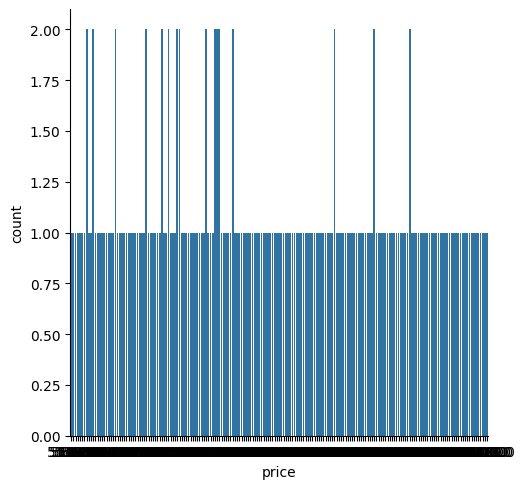

In [48]:
sns.catplot(x='price', data = df,kind='count')

<Axes: xlabel='price', ylabel='horsepower'>

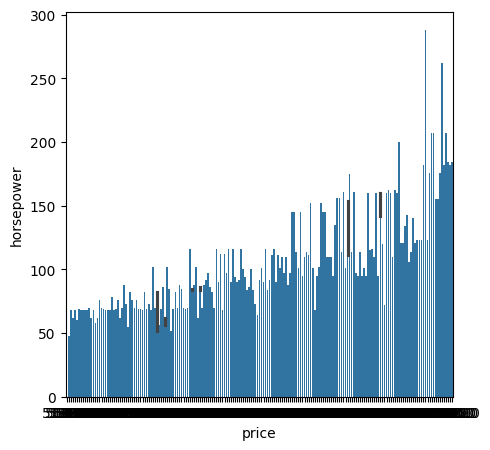

In [50]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='price', y = 'horsepower', data =df)

In [51]:
# Correlation between variables
correlation = numerical_df.corr()

<Axes: >

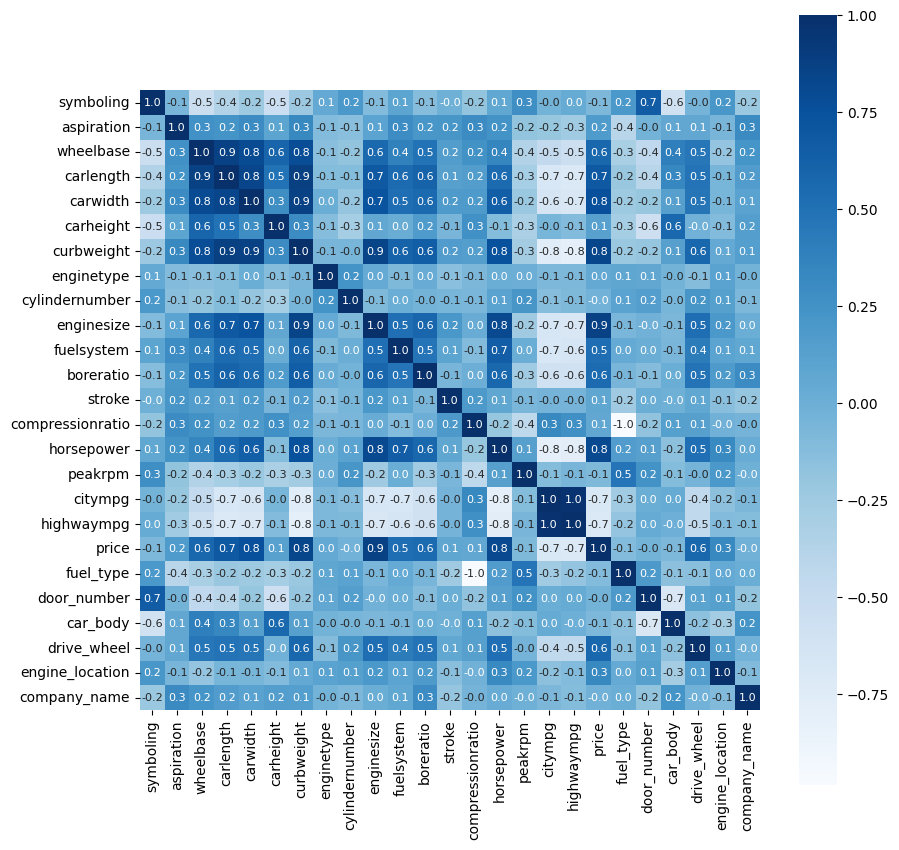

In [52]:
# plot a heatmap to get better understandin of the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [53]:
# train&test split
x_train, _test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
print(y.shape, y_train.shape, y_test.shape)

(205, 1) (164, 1) (41, 1)


In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
random_forest = RandomForestRegressor()

In [57]:
random_forest.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [58]:
y_pred = regressor.predict(x_test)


In [59]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 159120104.83414093


In [60]:
print("Predictions:", y_pred)

Predictions: [ 6692.     7957.     6377.     8916.5   10345.    28248.     8238.
  5348.     6377.     9988.    17859.167 17075.    16630.     9258.
 12629.    11595.     9960.     6575.    18620.    11549.     8921.
  6849.    16845.     7957.     9895.     7299.    14869.     7975.
  6229.     7299.     7957.     8921.    40960.     9258.    17075.
  7788.     8358.    30760.    15250.    22470.     5348.   ]


4. Gradient Boosting Regreesor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [66]:
# Fit the model on the training data
regressor.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [69]:
# Predict on the test data
y_pred = regressor.predict(x_test)

In [68]:
# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 640032.3851059441


In [70]:
print("Predictions:", y_pred)

Predictions: [31395.43524522 17949.60474584  9585.12194653 11835.21535479
 31379.63004703  7788.67730434  7764.59576325  9287.1614904
 10145.6645499   7794.85220651 13214.67377271  8184.21049272
 18345.52959718 10019.76374322 40509.74202857  6522.03546542
  5181.19378538 12752.48855017  8196.03074495  9953.44865373
  8557.43290315 13539.29696326  8191.23148297  6506.06292205
  6701.89681799 41709.99214702  9556.73149083 13518.8468573
  7987.18735547 12959.86455313 27833.30757435  6230.76884583
  7913.09918015 21250.57507794  7804.79934577 31379.63004703
 11213.62880674 10844.4062406   8919.37904548 14271.45558566
  7505.41194214]


5. Support Vector Regressor

In [74]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
# Initialize the SVR model with an RBF kernel
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

In [77]:
# Fit the model on the training data
svr.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.2)

In [78]:
# Predict on the test data
y_pred = svr.predict(x_test)

In [79]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 86678612.20133056
R^2 Score: -0.09797564445651297
